# **Proyek Analisis Data : Bike Sharing**


---


Nama : Jihan Hasna Iftinan

Email : m296b4kx2069@bangkit.academy

ID dicoding : jihan_hasna_iftinan_m296b4kx2069_j3ed

**Pertanyaan bisnis :**
1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda harian?
2. Apakah terdapat perbedaan perilaku penyewaan sepeda antara hari kerja dan akhir pekan?

# **Import Seluruh Library Yang dibutuhkan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

**Gathering Data**

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Assessing Data**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


hal yang di perbaiki :
1. Konversi kolom dteday ke format datetime.

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


from matplotlib import pyplot as plt
_df_0['instant'].plot(kind='hist', bins=20, title='instant')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['season'].plot(kind='hist', bins=20, title='season')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['yr'].plot(kind='hist', bins=20, title='yr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['mnth'].plot(kind='hist', bins=20, title='mnth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='instant', y='season', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='season', y='yr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='yr', y='mnth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='mnth', y='holiday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['instant'].plot(kind='line', figsize=(8, 4), title='instant')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['season'].plot(kind='line', figsize=(8, 4), title='season')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['yr'].plot(kind='line', figsize=(8, 4), title='yr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['mnth'].plot(kind='line', figsize=(8, 4), title='mnth')
plt.gca().spines[['top', 'right']].set_visible(False)

Yang perlu di perbaiki :
1. kolom hum : Nilai kelembaban yang 0 perlu diperiksa karena mungkin ada kesalahan dalam pencatatan data.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Hal yang diperbaiki :
1. Konversi kolom dteday ke format datetime

In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hal yang diperbaiki :
1. Periksa apakah ada baris di mana cnt tidak sama dengan penjumlahan dari casual dan registered.
2. Periksa nilai atemp, hum, windspeed yang 0 dan tentukan apakah data tersebut valid

**Cleaning Data**

Untuk day_df :
1. Konversi kolom dteday ke format datetime.
2. kolom hum : Nilai kelembaban yang 0 perlu diperiksa karena mungkin ada kesalahan dalam pencatatan data.

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
invalid_hum = day_df[day_df['hum'] == 0]
print(invalid_hum)


    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
68       69 2011-03-10       1   0     3        0        4           1   

    weathersit      temp     atemp  hum  windspeed  casual  registered  cnt  
68           3  0.389091  0.385668  0.0   0.261877      46         577  623  


In [ ]:
print(f"Jumlah baris dengan kelembaban 0: {invalid_hum.shape[0]}")

Jumlah baris dengan kelembaban 0: 1


In [ ]:
print(invalid_hum.describe())


       instant               dteday  season   yr  mnth  holiday  weekday  \
count      1.0                    1     1.0  1.0   1.0      1.0      1.0   
mean      69.0  2011-03-10 00:00:00     1.0  0.0   3.0      0.0      4.0   
min       69.0  2011-03-10 00:00:00     1.0  0.0   3.0      0.0      4.0   
25%       69.0  2011-03-10 00:00:00     1.0  0.0   3.0      0.0      4.0   
50%       69.0  2011-03-10 00:00:00     1.0  0.0   3.0      0.0      4.0   
75%       69.0  2011-03-10 00:00:00     1.0  0.0   3.0      0.0      4.0   
max       69.0  2011-03-10 00:00:00     1.0  0.0   3.0      0.0      4.0   
std        NaN                  NaN     NaN  NaN   NaN      NaN      NaN   

       workingday  weathersit      temp     atemp  hum  windspeed  casual  \
count         1.0         1.0  1.000000  1.000000  1.0   1.000000     1.0   
mean          1.0         3.0  0.389091  0.385668  0.0   0.261877    46.0   
min           1.0         3.0  0.389091  0.385668  0.0   0.261877    46.0   
25%    

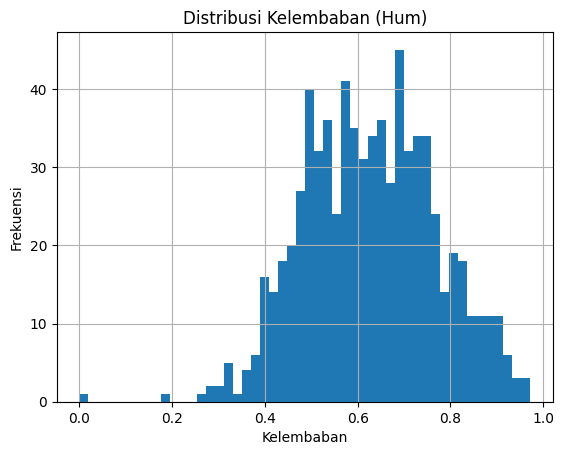

In [ ]:
day_df['hum'].hist(bins=50)
plt.title('Distribusi Kelembaban (Hum)')
plt.xlabel('Kelembaban')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
day_df.drop(day_df[day_df['hum'] == 0].index, inplace=True)


In [ ]:
zero_hum_count = day_df['hum'].value_counts().get(0, 0)
print(f"Jumlah nilai 0 di kolom 'hum': {zero_hum_count}")


Jumlah nilai 0 di kolom 'hum': 0


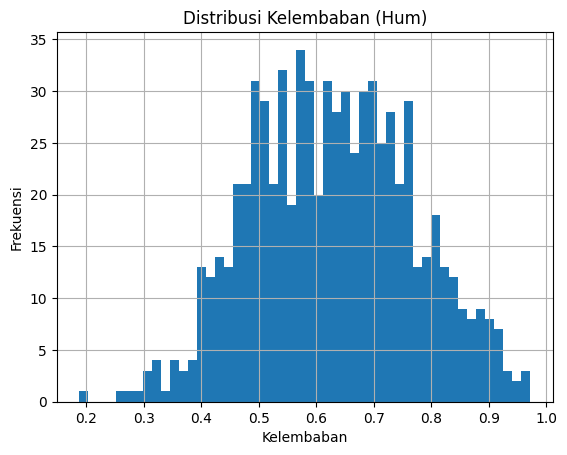

In [ ]:
day_df['hum'].hist(bins=50)
plt.title('Distribusi Kelembaban (Hum)')
plt.xlabel('Kelembaban')
plt.ylabel('Frekuensi')
plt.show()


Untuk hour_df :
1. Konversi kolom dteday ke format datetime
2. Periksa apakah ada baris di mana cnt tidak sama dengan penjumlahan dari casual dan registered.
3. Periksa nilai atemp, hum, windspeed yang 0 dan tentukan apakah data tersebut valid

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
hour_df['check_cnt'] = hour_df['casual'] + hour_df['registered']
hour_df[hour_df['cnt'] != hour_df['check_cnt']]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,check_cnt


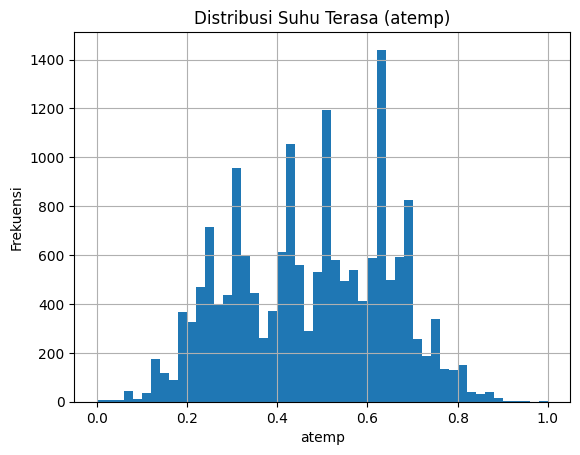

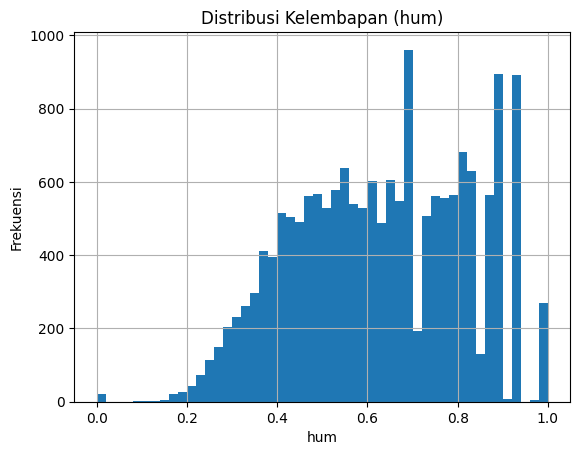

Text(0, 0.5, 'Frekuensi')

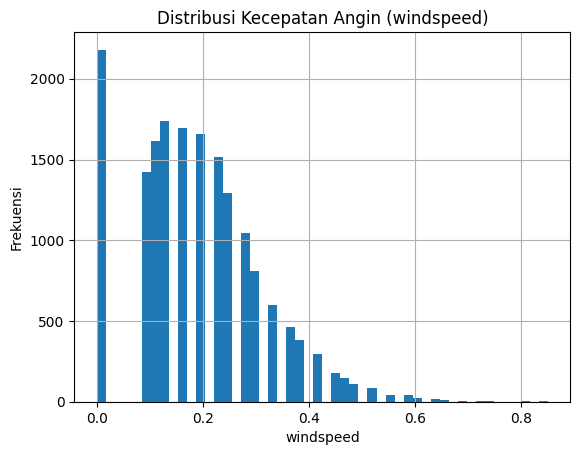

In [ ]:
hour_df['atemp'].hist(bins=50)
plt.title('Distribusi Suhu Terasa (atemp)')
plt.xlabel('atemp')
plt.ylabel('Frekuensi')
plt.show()

hour_df['hum'].hist(bins=50)
plt.title('Distribusi Kelembapan (hum)')
plt.xlabel('hum')
plt.ylabel('Frekuensi')
plt.show()

hour_df['windspeed'].hist(bins=50)
plt.title('Distribusi Kecepatan Angin (windspeed)')
plt.xlabel('windspeed')
plt.ylabel('Frekuensi')

In [ ]:
invalid_hum2 = hour_df[hour_df['hum'] == 0]
print(invalid_hum2)

      instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1551     1552 2011-03-10       1   0     3   0        0        4           1   
1552     1553 2011-03-10       1   0     3   1        0        4           1   
1553     1554 2011-03-10       1   0     3   2        0        4           1   
1554     1555 2011-03-10       1   0     3   5        0        4           1   
1555     1556 2011-03-10       1   0     3   6        0        4           1   
1556     1557 2011-03-10       1   0     3   7        0        4           1   
1557     1558 2011-03-10       1   0     3   8        0        4           1   
1558     1559 2011-03-10       1   0     3   9        0        4           1   
1559     1560 2011-03-10       1   0     3  10        0        4           1   
1560     1561 2011-03-10       1   0     3  11        0        4           1   
1561     1562 2011-03-10       1   0     3  12        0        4           1   
1562     1563 2011-03-10       1   0    

In [ ]:
print(f"Jumlah baris dengan kelembaban 0: {invalid_hum2.shape[0]}")

Jumlah baris dengan kelembaban 0: 22


# **Exploratory Data Analysis**

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2012-01-01 09:45:51.780822016,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2011-07-03 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,2012-01-01 12:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,2012-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.023699,NaN,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.163040,0.140614,0.077506,686.449738,1557.149836,1933.194931


In [ ]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"],
})
print(weather_effect)

             cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1862.300000  1241.886981


In [ ]:
weather_effect = day_df.groupby('weathersit')['cnt'].mean()
print(weather_effect)

weathersit
1    4876.786177
2    4035.862348
3    1862.300000
Name: cnt, dtype: float64


weathersit: Kondisi cuaca:
1: Cerah, sedikit awan
2: Berkabut, mendung
3: Hujan ringan, salju ringan
4: Hujan lebat, badai

In [ ]:
day_df.groupby('workingday').agg({
    'cnt': ['mean', 'sum', 'std', 'count']
})

cnt                            
                   mean      sum          std count
workingday                                         
0           4330.168831  1000269  2052.141245   231
1           4592.759519  2291787  1871.883827   499

In [ ]:
rental_behavior = day_df.groupby('workingday')['cnt'].mean()
print(rental_behavior)

workingday
0    4330.168831
1    4592.759519
Name: cnt, dtype: float64


hari kerja (1) dan bukan hari kerja (0)

# **Visualization & Explanatory Analysis**

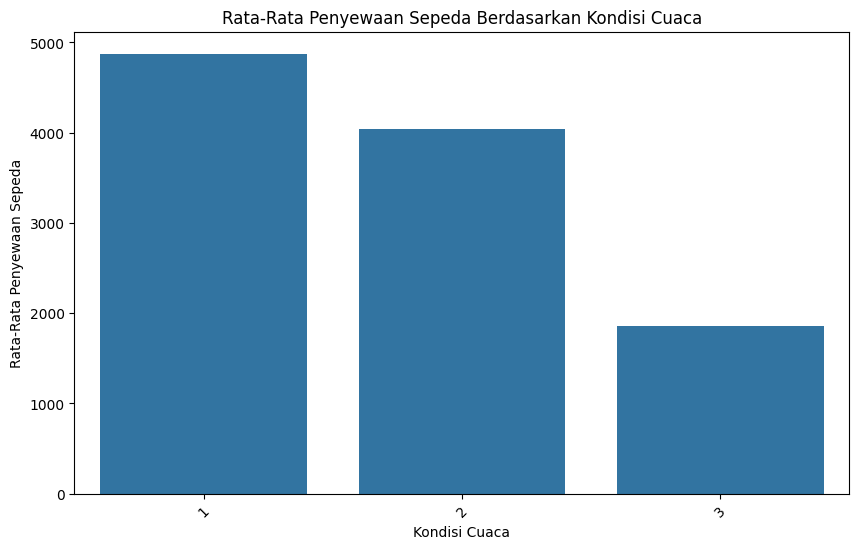

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_effect.index, y=weather_effect.values)
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

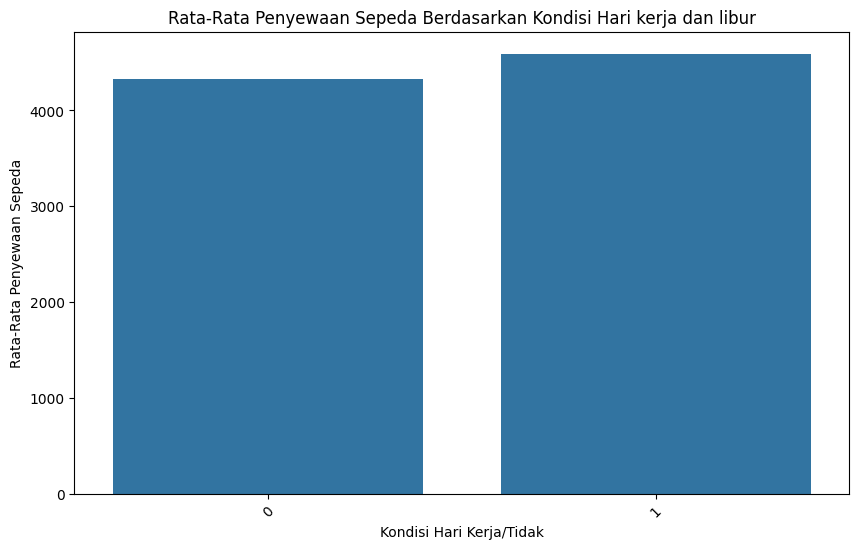

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rental_behavior.index, y=rental_behavior.values)
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Hari kerja dan libur')
plt.xlabel('Kondisi Hari Kerja/Tidak')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

# **Pertanyaan 1**

Untuk menjawab pertanyaan 1 maka diperoleh jawaban :
Dalam barplot diatas menunjukkan bahwa **kondisi cuaca yang cerah dan sedikit awan sangat mendukung aktivitas penyewaan sepeda**. Pengguna cenderung lebih banyak menyewa sepeda ketika cuaca baik. **Sedangkan Kondisi cuaca yang buruk seperti hujan ringan atau salju ringan memiliki dampak signifikan terhadap penurunan jumlah penyewaan sepeda**. Hal ini mencerminkan bahwa pengguna cenderung menghindari menyewa sepeda dalam cuaca yang tidak bersahabat.

# **Pertanyaan 2**

Untuk menjawab pertanyaan 2 maka diperoleh jawaban :
Dari hasil barplot di atas dapat diketahui bahwa **Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.**

# **Conclusion**



*   Pertanyaan 1 :
Dari analisis barplot yang ditampilkan, dapat disimpulkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap tingkat penyewaan sepeda. Pada kondisi cuaca yang cerah atau hanya sedikit berawan, penyewaan sepeda cenderung meningkat secara signifikan. Hal ini menandakan bahwa pengguna lebih nyaman dan terdorong untuk menyewa sepeda saat cuaca mendukung. Sebaliknya, cuaca buruk seperti hujan ringan atau salju ringan terlihat berdampak besar terhadap penurunan penyewaan. Pengguna cenderung menghindari bersepeda dalam kondisi cuaca yang tidak bersahabat karena alasan kenyamanan dan keamanan, yang akhirnya mempengaruhi keputusan mereka untuk tidak menyewa sepeda. Dengan demikian, kondisi cuaca dapat dianggap sebagai salah satu faktor utama yang mempengaruhi fluktuasi penyewaan sepeda.
*   Pertanyaan 2:
Dari data yang dianalisis melalui barplot, dapat disimpulkan bahwa penyewaan sepeda lebih banyak terjadi pada hari kerja dibandingkan dengan akhir pekan. Hal ini dapat dikaitkan dengan fakta bahwa pada hari kerja, sepeda kemungkinan besar digunakan sebagai alat transportasi sehari-hari, terutama untuk bepergian ke tempat kerja atau sekolah. Sebaliknya, pada akhir pekan, meskipun beberapa pengguna mungkin masih menyewa sepeda untuk rekreasi atau olahraga, jumlahnya tidak sebanyak pada hari kerja. Tren ini menunjukkan adanya hubungan antara aktivitas penyewaan sepeda dengan rutinitas dan jadwal harian pengguna yang lebih aktif selama hari kerja.



# **Menyimpan berkas data yang telah dibersihkan**

In [ ]:
day_df.to_csv("all_data.csv", index=False)